In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class info(TypedDict):
    marks:list[int]
    name: str
    id: int
    result: str
    operation:str
    result2:int

In [3]:
def process_data(state:info) -> info:
    if(state['operation']=='+'):
        state['result2']=sum(state['marks'])
    elif(state['operation']=='*'):
        state['result2']=1
        for mark in state['marks']:
            state['result2']*=mark
                
    state['result']='Hi there, your name is '+state['name']+' and your total marks are '+str(sum(state['marks']))
    return state

In [4]:
graph=StateGraph(info)
graph.add_node("proceesor",process_data)
graph.set_entry_point("proceesor")
graph.set_finish_point("proceesor")
app=graph.compile()
result=app.invoke({"name":"Nisarg","marks":[85,90,78],"id":123,"operation":'*'})
print(result["result"])
print(result["result2"])

Hi there, your name is Nisarg and your total marks are 253
596700


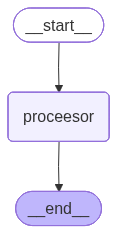

In [5]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))